In [1]:
install.packages(c("tidyverse"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages(c("quantmod"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘TTR’




In [3]:
install.packages(c("caret"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘pROC’, ‘recipes’, ‘reshape2’




In [5]:
install.packages(c("lubridate"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages(c("ggplot2"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages(c("zoo"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages(c("randomForest"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages("xts")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(tidyverse)
library(lubridate)
library(quantmod)

stock_data <- read_csv("stock-data.csv")

New names:
• `` -> `...1`
Rows: 11291 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): ...1, Adj Close, Close, High, Low, Open, Volume
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
head(stock_data)
summary(stock_data)

...1,Date,Adj Close,Close,High,Low,Open,Volume
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409
5,1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803


      ...1            Date              Adj Close           Close        
 Min.   :    0   Min.   :1980-03-17   Min.   :  2.259   Min.   :  3.238  
 1st Qu.: 2822   1st Qu.:1991-05-17   1st Qu.: 19.225   1st Qu.: 27.500  
 Median : 5645   Median :2002-07-26   Median : 50.609   Median : 66.035  
 Mean   : 5645   Mean   :2002-08-03   Mean   : 63.609   Mean   : 72.027  
 3rd Qu.: 8468   3rd Qu.:2013-10-21   3rd Qu.:104.724   3rd Qu.:114.297  
 Max.   :11290   Max.   :2024-12-27   Max.   :254.770   Max.   :254.770  
                 NA's   :110          NA's   :93        NA's   :117      
      High              Low               Open            Volume        
 Min.   :  3.238   Min.   :  3.238   Min.   :  0.00   Min.   :       0  
 1st Qu.: 27.789   1st Qu.: 27.536   1st Qu.:  0.00   1st Qu.:   13500  
 Median : 66.725   Median : 65.419   Median : 66.06   Median :   90324  
 Mean   : 72.503   Mean   : 71.665   Mean   : 68.00   Mean   :  214416  
 3rd Qu.:114.892   3rd Qu.:113.640   3rd Qu

In [31]:
stock_data <- read_csv("stock-data.csv") %>%
  drop_na()

New names:
• `` -> `...1`
Rows: 11291 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): ...1, Adj Close, Close, High, Low, Open, Volume
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


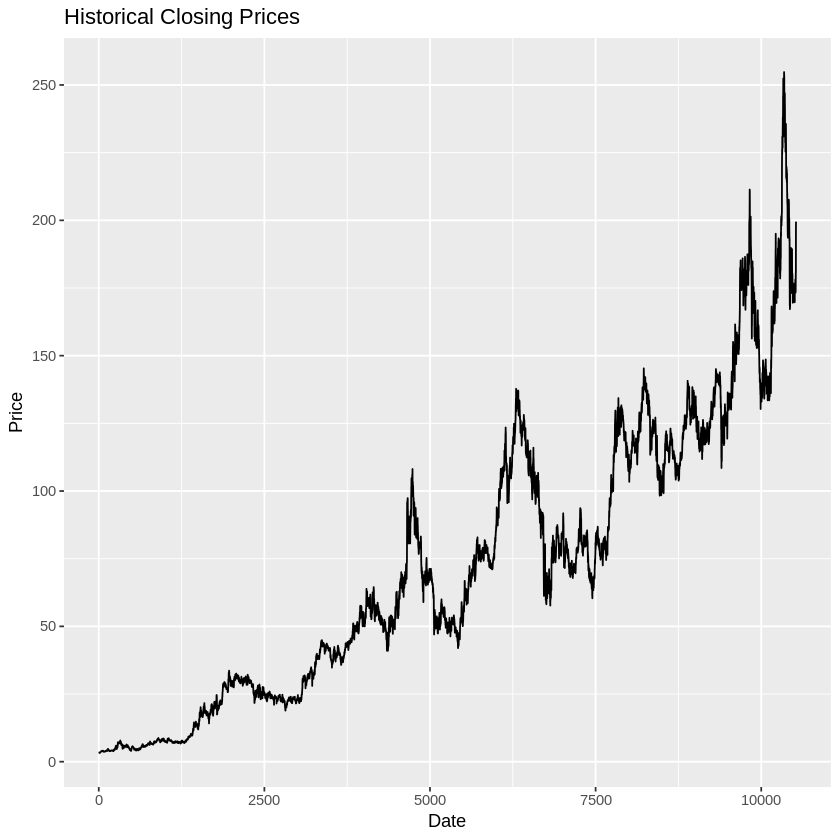

In [32]:
ggplot(stock_data, aes(x = index(stock_data))) +
  geom_line(aes(y = Close)) +
  labs(title = "Historical Closing Prices", x = "Date", y = "Price") #price chart

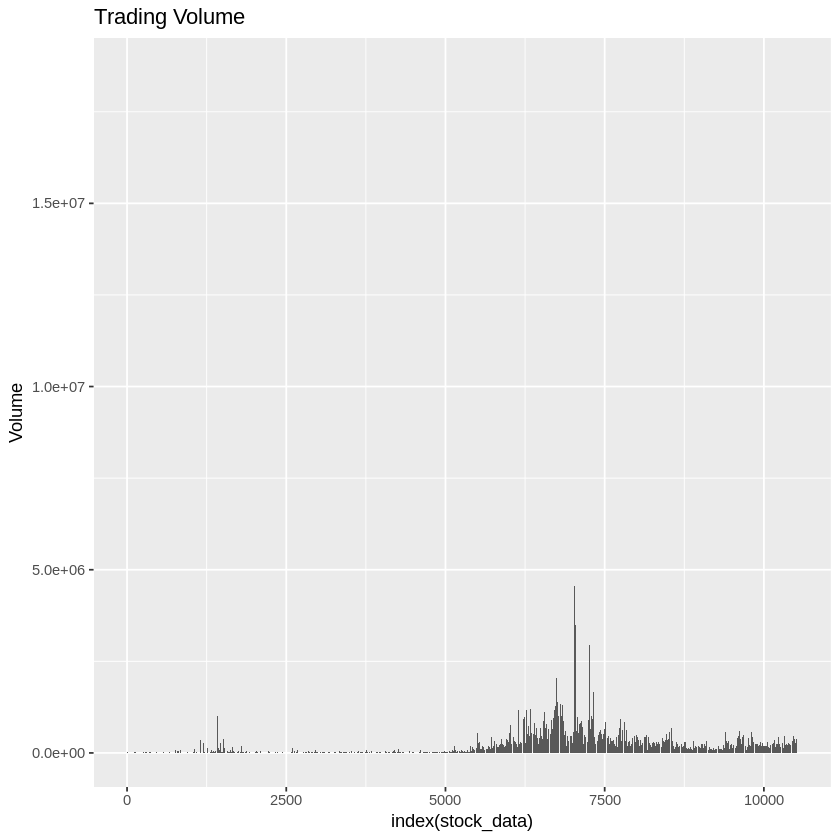

In [33]:
ggplot(stock_data, aes(x = index(stock_data))) +
  geom_bar(aes(y = Volume), stat = "identity") +
  labs(title = "Trading Volume") #volume chart

In [34]:
sum(is.na(stock_data))

[1] 0

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


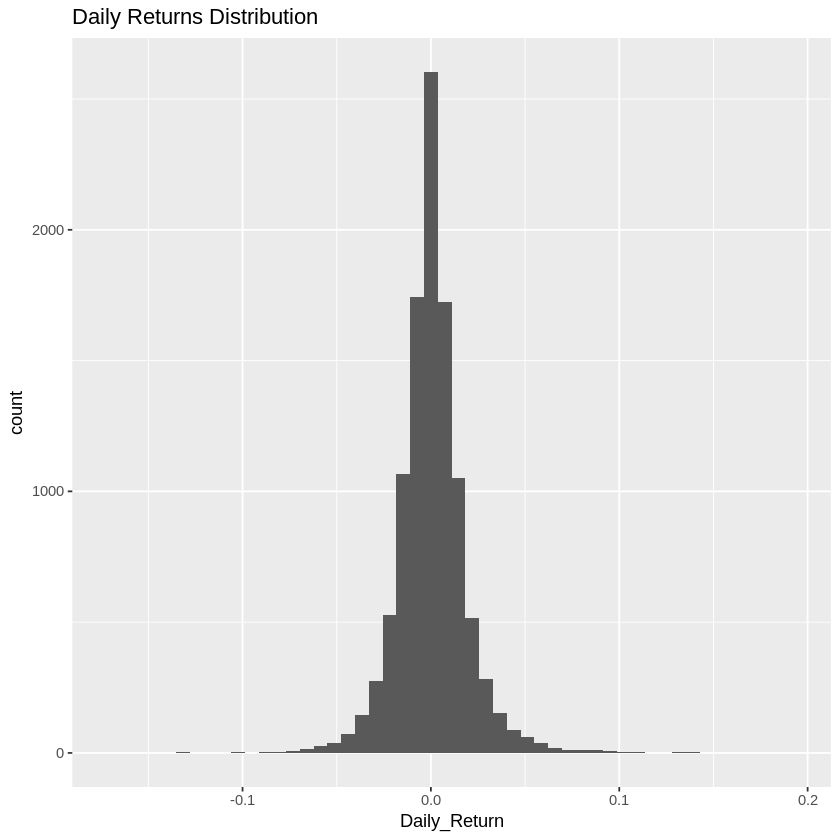

In [37]:
stock_data <- stock_data %>%
  mutate(Daily_Return = (Close - lag(Close)) / lag(Close))

ggplot(stock_data, aes(Daily_Return)) +
  geom_histogram(bins = 50) +
  labs(title = "Daily Returns Distribution")  #daily returns analysis

In [63]:
library(zoo)

# Create technical features
stock_data <- stock_data %>%
  mutate(
    Lag_1 = lag(Close, 1),
    Lag_2 = lag(Close, 2),
    Lag_3 = lag(Close, 3),
    MA_5 = rollmean(Close, 5, fill = NA, align = "right"),
    MA_20 = rollmean(Close, 20, fill = NA, align = "right"),
    RSI = RSI(Close, n = 14),
    Momentum = Close - lag(Close, 5)
  ) %>%
  mutate(
    Day = day(Date),
    Month = month(Date),
    Weekday = wday(Date, label = TRUE)
  ) %>%
  mutate(Target = lead(Close, 5)) %>%  # 5-day future price
  na.omit()

In [56]:
install.packages("xgboost", repos = "http://cran.us.r-project.org") # Install xgboost within the R session
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [66]:
library(caret)
library(randomForest)

# Split data
train_idx <- createDataPartition(stock_data$Target, p = 0.8, list = FALSE)
train <- stock_data[train_idx, ]
test <- stock_data[-train_idx, ]

# Linear Regression
lm_model <- lm(Target ~ ., data = train)
lm_pred <- predict(lm_model, newdata = test)

# Random Forest
rf_model <- randomForest(Target ~ . - `Adj Close`, data = train, ntree = 100)
rf_pred <- predict(rf_model, newdata = test)

# XGBoost
train_matrix <- train %>%
  mutate(across(where(is.character), as.factor),
         across(where(is.factor), as.numeric),
         Date = as.numeric(as.Date(Date))) %>%
  select(-Target) %>% #
  as.matrix()

test_matrix <- test %>%
  mutate(across(where(is.character), as.factor),
         across(where(is.factor), as.numeric),
         Date = as.numeric(as.Date(Date))) %>%
  select(-Target) %>%
  as.matrix()

xgb_model <- xgboost(
  data = train_matrix,
  label = train$Target,
  nrounds = 100,
  objective = "reg:squarederror"
)

xgb_pred <- predict(xgb_model, test_matrix)

[1]	train-rmse:61.942571 
[2]	train-rmse:43.498575 
[3]	train-rmse:30.585465 
[4]	train-rmse:21.556068 
[5]	train-rmse:15.260623 
[6]	train-rmse:10.892661 
[7]	train-rmse:7.879339 
[8]	train-rmse:5.832405 
[9]	train-rmse:4.446136 
[10]	train-rmse:3.558819 
[11]	train-rmse:2.987451 
[12]	train-rmse:2.645183 
[13]	train-rmse:2.436198 
[14]	train-rmse:2.306867 
[15]	train-rmse:2.233509 
[16]	train-rmse:2.154496 
[17]	train-rmse:2.109931 
[18]	train-rmse:2.074177 
[19]	train-rmse:2.046241 
[20]	train-rmse:2.022398 
[21]	train-rmse:1.995138 
[22]	train-rmse:1.975605 
[23]	train-rmse:1.951035 
[24]	train-rmse:1.936278 
[25]	train-rmse:1.904654 
[26]	train-rmse:1.899326 
[27]	train-rmse:1.890368 
[28]	train-rmse:1.846566 
[29]	train-rmse:1.814841 
[30]	train-rmse:1.807897 
[31]	train-rmse:1.803046 
[32]	train-rmse:1.790688 
[33]	train-rmse:1.784244 
[34]	train-rmse:1.776629 
[35]	train-rmse:1.747807 
[36]	train-rmse:1.716048 
[37]	train-rmse:1.707418 
[38]	train-rmse:1.698663 
[39]	train-rmse

RMSE  Rsquared       MAE 
3.0206618 0.9964973 1.9114520

RMSE  Rsquared       MAE 
2.3113083 0.9979484 1.4347756

RMSE  Rsquared       MAE 
2.3565003 0.9978678 1.5368620

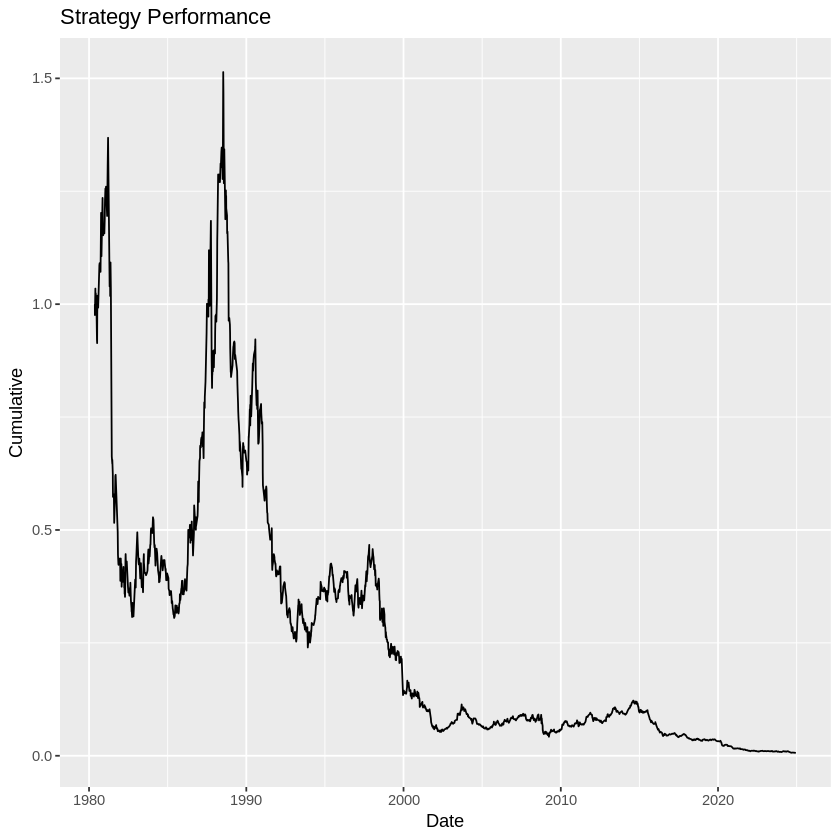

In [70]:
# Metrics calculation
postResample(pred = lm_pred, obs = test$Target)
postResample(pred = rf_pred, obs = test$Target)
postResample(pred = xgb_pred, obs = test$Target)

# Trading simulation
test_data <- test %>%
  mutate(
    Prediction = xgb_pred,
    Position = ifelse(Prediction > Close, 1, -1),
    Returns = Position * (Close - lag(Close)) / lag(Close),
    Cumulative = cumprod(1 + coalesce(Returns, 0))
  )

ggplot(test_data, aes(x = Date)) +
  geom_line(aes(y = Cumulative)) +
  labs(title = "Strategy Performance")

In [73]:
# Train final model
final_model <- xgboost(
  data = as.matrix(stock_data[, -which(names(stock_data) %in% c("Target", "Date", "Weekday"))] %>%
    mutate(across(where(is.character), as.factor),
           across(where(is.factor), as.numeric))),
  label = stock_data$Target,
  nrounds = 100
)

# Create future dataset (example structure)
future_dates <- seq(max(stock_data$Date), by = "1 day", length.out = 10) %>%
  as_tibble() %>%
  rename(Date = value) %>%
  filter(!weekdays(Date) %in% c("Saturday", "Sunday")) %>%
  head(5)

# Assuming 'future_features_matrix' will be created with the same structure as the training data
# but with future dates
future_features_matrix <- stock_data[1:5, -which(names(stock_data) %in% c("Target", "Date", "Weekday"))] %>%
  mutate(across(where(is.character), as.factor),
           across(where(is.factor), as.numeric)) %>%
  as.matrix()

predictions <- predict(final_model, newdata = future_features_matrix)
write_csv(data.frame(Date = future_dates, Predicted_Close = predictions), "predictions.csv")

[1]	train-rmse:61.904491 
[2]	train-rmse:43.459061 
[3]	train-rmse:30.545959 
[4]	train-rmse:21.521750 
[5]	train-rmse:15.229760 
[6]	train-rmse:10.867136 
[7]	train-rmse:7.859246 
[8]	train-rmse:5.814681 
[9]	train-rmse:4.448320 
[10]	train-rmse:3.568960 
[11]	train-rmse:3.012960 
[12]	train-rmse:2.659266 
[13]	train-rmse:2.470631 
[14]	train-rmse:2.341928 
[15]	train-rmse:2.275193 
[16]	train-rmse:2.219126 
[17]	train-rmse:2.176200 
[18]	train-rmse:2.143471 
[19]	train-rmse:2.109572 
[20]	train-rmse:2.058587 
[21]	train-rmse:2.034445 
[22]	train-rmse:2.022186 
[23]	train-rmse:2.001664 
[24]	train-rmse:1.992780 
[25]	train-rmse:1.984458 
[26]	train-rmse:1.965731 
[27]	train-rmse:1.958903 
[28]	train-rmse:1.921950 
[29]	train-rmse:1.903128 
[30]	train-rmse:1.872326 
[31]	train-rmse:1.867601 
[32]	train-rmse:1.864590 
[33]	train-rmse:1.852987 
[34]	train-rmse:1.843054 
[35]	train-rmse:1.839901 
[36]	train-rmse:1.822987 
[37]	train-rmse:1.802077 
[38]	train-rmse:1.786688 
[39]	train-rmse